In [136]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set_theme()

## 1. Постановка задачи

Используя схему бегущего счета и итерационные методы, решить задачу:

$$
\frac{\partial u}{\partial t} - \frac{4u^3}{1 + (1+u^4)^2} \frac{\partial u}{\partial x} = 0, \quad -1 \leq x < 0,
$$

$$
u(x, 0) = x^2,
$$

$$
u(0, t) = 0.
$$


## 2. Нахождение характеристик

### Уравнения характеристик:

$$
\frac{dt}{1} = -\frac{1 + (1 + u^4)^2}{4u^3} dx = \frac{du}{0}
$$

### Решение:

$$
u = u(x_0, t_0) = \text{const},
$$

$$
t - t_0 = -\frac{1 + (1 + u^4)^2}{4u^3} (x - x_0),
$$

$$
\; x - x_0 = -\frac{4u^3}{1 + (1 + u^4)^2}(t - t_0)
$$

Рассмотрим граничные и начальные условия для получения двух семейств характеристик:

$
1 ) \; t_0 = 0,\; u(x_0, 0) = x_0^2, \; t = -\frac{1 + (1 + x_0^8)^2}{4x_0^6}(x - x_0)
$


$
2) \; x_0 = 0,\; u(0, t_0) = 0,
\; x = 0
$

In [217]:
def charfunc(x: np.ndarray, x0: float) -> np.ndarray:
    # charactheristic function calculation when t0 = 0
    return -(1 + (1 + x0 ** 8) ** 2) / (4 * x0 ** 6) * (x - x0)

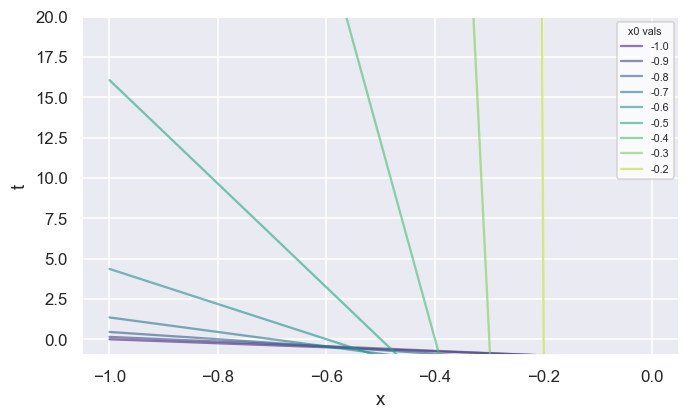

In [216]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=110)

x0_values = np.arange(-1, -0.1, 0.1)
x_values = np.linspace(-1, 0, 50)

palette = sns.color_palette("viridis", n_colors=len(x0_values))

for i, x0_value in enumerate(x0_values):
    t_values = charfunc(x_values, x0_value)
    ax.plot(x_values, t_values, color=palette[i], alpha=0.6, label=f"{np.round(x0_value, 1)}")

ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_ylim(-1, 20)

fsize = 7
ax.legend(fontsize=fsize, facecolor="w", title='x0 vals', title_fontsize=fsize)

Как видно из этих графиков, в области $x \in [-1, 0), \; t \in (0, \infty)$ прямые не пересекаются, а, следовательно, в этой области решение определено однозначно. Для удобства возьмем достаточно большое t, но при этом не слишком большое, чтобы не было проблем в численном решении, например 10.

## 3. Аналитическое решение

Для аналитического решения нам так же необходимо проверить, пересекаются ли уравнения характеристик:

$$
\frac{dt}{1} = -\frac{(1 + (1 + u^4)^2)}{4u^3} dx, \quad \frac{du}{0}
$$

После решения получаем первые интегралы:

$$
u = C_1
$$

$$
t + \frac{1 + (1 + u^4)^2}{4u^3} x = C_2
$$

где $C_1, C_2$ - произвольные константы.

Тогда общим решением будет: $F(x,t,u) = F(C_1, C_2) = 0$.

### Подстановка начальных условий:

$$
u(x,0) = x^2 = C_1
$$

$$
1 + (1 + C_1^4)^2 \frac{1}{4C_1^3} \sqrt{C_1} = C_2
$$

Так как $-1 < x < 0$, то $C_1 = u \in (0; 1]$. И значение $u$ задается невырожденной функцией:

$$
t + \frac{1 + (1 + u^4)^2}{4u^3} (x + \sqrt{u}) = 0, \quad u \in (0,1]
$$

### Подстановка граничных условий:

$$
u(0,t) = 0 = C_1
$$

$$
t = C_2
$$

Очевидно, что $u = 0$.

При домножении на $u^3$ выражения, получившегося при подстановки начальных условий, и некоторых последующих преобразований, 
мы получим наше аналичитеское решение:

$$
4u^3 t + x (2 + u^8 + 2u^4) + 2 \sqrt{u} + u^{8.5} + 2u^{4.5} = 0, \quad u \in (0,1]
$$

После интегрирования характеристик получим:

$$
x - x_0 = \frac{-4u^3}{1 + (1 + u^4)^2} (t - t_0)
$$


## 4. Численное решение

Заметим, что уравнение можно переписать в данном виде:

$$
\frac{\partial u}{\partial t} + \frac{\partial}{\partial x} (\tan^{-1}(u^4 + 1)) = 0 \tag{10}
$$

тогда создадим разностную сетку:

$$
\omega = \{x_i = -i\Delta x, \, i = 0, 1, \ldots, N, \, h = \frac{1}{N}, \, t_j = j\tau, \, j \}
$$

$$
\tau = \frac{1}{N_t}, \, j = 0, 1, \ldots, N_t \} \tag{11}
$$


Учтя граничные условия, мы получаем:

$$
u_{i,0} = x_i^2, \; u_{0,j} = 0
$$

$$
\alpha(u) = -\tan^{-1}(u^4 + 1)
$$

Воспользуемся следующей разностной схемой:

$$
\frac{u_{i,j+1} - u_{i,j}}{\tau} + \alpha(u_{i,j+1}) - \alpha(u_{i,j+1}) = 0
$$

Для решения воспользуемся методом Ньютона, для него верно следующее выражения для значения $u_{i,j+1}$:

$$
u_{i,j+1}^{(s+1)} = u_{i,j+1}^{(s)} + \frac{f(u_{i,j+1}^{(s)})}{f'(u_{i,j+1}^{(s)})} \tag{where}
$$

$$
f(u_{i,j+1}^{(s)}) = u_{i,j+1}^{(s)} + \alpha(u_{i,j+1}^{(s)}) \cdot \frac{1}{h} + \text{const} = \frac{1}{\tau} + \frac{4u_{i,j+1}^{3}}{(1 + (1 + u_{i,j+1}^4)^2)} \cdot h
$$

Процесс приближения закончится если:

$$
\left|\Delta u_{i,j+1}^{(s)}\right| = \left| \frac{f(u_{i,j+1}^{(s)})}{f'(u_{i,j+1}^{(s)})} \right| < \varepsilon
$$

где $\varepsilon$ выбрано заранее.


In [196]:
class DifferentialEquationSolver:
    """
    A special class for solving differential equations using Newton's method
    """
    
    def __init__(self, num_x_points: float, num_t_points: float, x_boundary: float, t_boundary: float, precision: float):
        # initialization for both grid and newton method
        self.num_x_points = num_x_points
        self.num_t_points = num_t_points
        self.x_boundary = x_boundary
        self.t_boundary = t_boundary
        self.precision = precision
        self.grid_values = np.zeros((num_x_points, num_t_points), dtype=float)
        self.x_values, self.t_values = np.linspace(x_boundary, 0, num_x_points), np.linspace(0, t_boundary, num_t_points)
        self.x_step = x_boundary / (num_x_points - 1)
        self.t_step = t_boundary / (num_t_points - 1)

    def initialize_conditions(self) -> None:
        # setting initial conditions
        self.grid_values[:, 0] = np.square(self.x_values) 
        self.grid_values[0, :] = 0  
    
    def calculate_p(self, x: float) -> float:
        # just for speeding up the calculations 
        return -np.arctan(x ** 4 + 1)
    
    def derivative_p(self, x: float) -> float:
        # calculating the derivative
        return -4 * x ** 3 / (1 + (x ** 4 + 1) ** 2)
    
    def newton_function(self, x: float, previous_t: float, previous_x: float) -> float:
        # defining the function for finding the root
        return (x - previous_t) / self.t_step + (self.calculate_p(x) - self.calculate_p(previous_x)) / self.x_step
    
    def derivative_newton_function(self, x: float) -> float:
        # computation of the derivative
        return 1 / self.t_step + self.derivative_p(x) / self.x_step
    
    def apply_newton_method(self, previous_t: float, previous_x: float) -> float:
        # apply the newton method for finding the root
        
        estimate = (previous_t + previous_x) / 2
        change = self.precision + 1
        while change > self.precision:
            current_estimate = estimate
            estimate = current_estimate - self.newton_function(current_estimate, previous_t, previous_x) / self.derivative_newton_function(current_estimate)
            change = abs(current_estimate - estimate)
        return estimate
    
    def solve(self) -> None:
        #solving the differential equation across the grid 
        
        self.initialize_conditions()
        for i in range(1, self.num_x_points):
            for j in range(1, self.num_t_points):
                self.grid_values[i, j] = self.apply_newton_method(self.grid_values[i, j - 1], self.grid_values[i - 1, j])


In [210]:
# set up all the variables, precision is eps

sol = DifferentialEquationSolver(num_x_points=1000, num_t_points=5000, x_boundary=-1, t_boundary=10, precision=0.001)
sol.solve()

## 5. Построение графиков



In [213]:
def plot_solution(x_values: np, t_values, solution_matrix):
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})
    solution_matrix = solution_matrix.T
    x_grid, t_grid = np.meshgrid(x_values, t_values)
    surface = ax.plot_surface(x_grid, t_grid, solution_matrix, cmap="viridis")
    
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u(x, t)')
    fig.colorbar(surface, ax=ax, shrink=0.3, aspect=20)

    ax.set_xlabel('x', fontsize=14, labelpad=10)
    ax.set_ylabel('t', fontsize=14, labelpad=10)
    ax.set_zlabel('u(x, t)', fontsize=14, labelpad=3)

    # rotate the plot
    ax.view_init(elev=30, azim=20)

    # plt.show() well, jupyter kinda does it itself

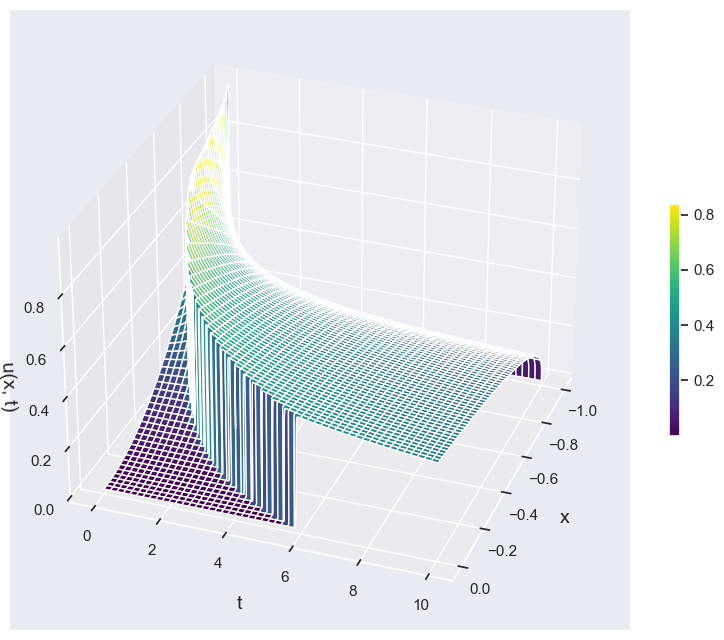

In [214]:
plot_solution(sol.x_values, sol.t_values, sol.grid_values)